In [7]:
import pandas as pd

In [3]:
import requests

api_key = "E911C960-894A-11EE-8616-42010A80000B"
sensor_id = 6910
endpoint = f"https://api.purpleair.com/v1/sensors/{sensor_id}/history"

headers = {
    "X-API-Key": api_key,
}

try:
    response = requests.get(endpoint, headers=headers)

    if response.status_code == 200:
        data = response.json()
        # Process and use the data as needed
        print(data)
    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")


Error: 400 - {
  "api_version" : "V1.0.11-0.0.49",
  "time_stamp" : 1700711235,
  "error" : "MissingFieldsParameterError",
  "description" : "Missing fields parameter."
}


In [5]:
import requests

api_key = "E911C960-894A-11EE-8616-42010A80000B"
sensor_id = 6910
endpoint = f"https://api.purpleair.com/v1/sensors/{sensor_id}/history"

headers = {
    "X-API-Key": api_key,
}

# Example parameters, you can modify or add more as needed
params = {
    "fields": "humidity,humidity_a,humidity_b,temperature,temperature_a,temperature_b,pressure,pressure_a,pressure_b",
}

try:
    response = requests.get(endpoint, headers=headers, params=params)

    if response.status_code == 200:
        data = response.json()
        # Process and use the data as needed
        print(data)
    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")


{'api_version': 'V1.0.11-0.0.49', 'time_stamp': 1700711642, 'sensor_index': 6910, 'start_timestamp': 1700452442, 'end_timestamp': 1700711642, 'average': 10, 'fields': ['time_stamp', 'humidity', 'humidity_a', 'humidity_b', 'temperature', 'temperature_a', 'temperature_b', 'pressure', 'pressure_a', 'pressure_b'], 'data': [[1700702400, 32.6, 32.6, None, 58.0, 58.0, None, 840.884, 840.884, None], [1700700600, 31.0, 31.0, None, 59.6, 59.6, None, 840.92, 840.92, None], [1700638200, 36.0, 36.0, None, 50.2, 50.2, None, 847.754, 847.754, None], [1700681400, 24.6, 24.6, None, 68.0, 68.0, None, 843.822, 843.822, None], [1700685000, 23.8, 23.8, None, 69.0, 69.0, None, 842.95, 842.95, None], [1700635800, 37.0, 37.0, None, 50.0, 50.0, None, 848.042, 848.042, None], [1700655000, 37.8, 37.8, None, 48.2, 48.2, None, 846.086, 846.086, None], [1700621400, 33.0, 33.0, None, 54.2, 54.2, None, 848.552, 848.552, None], [1700650200, 37.8, 37.8, None, 49.0, 49.0, None, 846.65, 846.65, None], [1700679000, 25.8, 

In [9]:
data

{'api_version': 'V1.0.11-0.0.49',
 'time_stamp': 1700711642,
 'sensor_index': 6910,
 'start_timestamp': 1700452442,
 'end_timestamp': 1700711642,
 'average': 10,
 'fields': ['time_stamp',
  'humidity',
  'humidity_a',
  'humidity_b',
  'temperature',
  'temperature_a',
  'temperature_b',
  'pressure',
  'pressure_a',
  'pressure_b'],
 'data': [[1700702400,
   32.6,
   32.6,
   None,
   58.0,
   58.0,
   None,
   840.884,
   840.884,
   None],
  [1700700600, 31.0, 31.0, None, 59.6, 59.6, None, 840.92, 840.92, None],
  [1700638200, 36.0, 36.0, None, 50.2, 50.2, None, 847.754, 847.754, None],
  [1700681400, 24.6, 24.6, None, 68.0, 68.0, None, 843.822, 843.822, None],
  [1700685000, 23.8, 23.8, None, 69.0, 69.0, None, 842.95, 842.95, None],
  [1700635800, 37.0, 37.0, None, 50.0, 50.0, None, 848.042, 848.042, None],
  [1700655000, 37.8, 37.8, None, 48.2, 48.2, None, 846.086, 846.086, None],
  [1700621400, 33.0, 33.0, None, 54.2, 54.2, None, 848.552, 848.552, None],
  [1700650200, 37.8, 37.8

In [10]:
# Fill in missing values with 0
for entry in data['data']:
    for i in range(len(entry)):
        if entry[i] is None:
            entry[i] = 0

# Create DataFrame
df = pd.DataFrame(data['data'], columns=data['fields'])
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')  # Convert timestamp to datetime if needed
df.head()

,time_stamp,humidity,humidity_a,humidity_b,temperature,temperature_a,temperature_b,pressure,pressure_a,pressure_b
0,2023-11-23 01:20:00,32.6,32.6,0,58.0,58.0,0,840.884,840.884,0
1,2023-11-23 00:50:00,31.0,31.0,0,59.6,59.6,0,840.920,840.920,0
2,2023-11-22 07:30:00,36.0,36.0,0,50.2,50.2,0,847.754,847.754,0
3,2023-11-22 19:30:00,24.6,24.6,0,68.0,68.0,0,843.822,843.822,0
4,2023-11-22 20:30:00,23.8,23.8,0,69.0,69.0,0,842.950,842.950,0


In [11]:
df.shape

(432, 10)

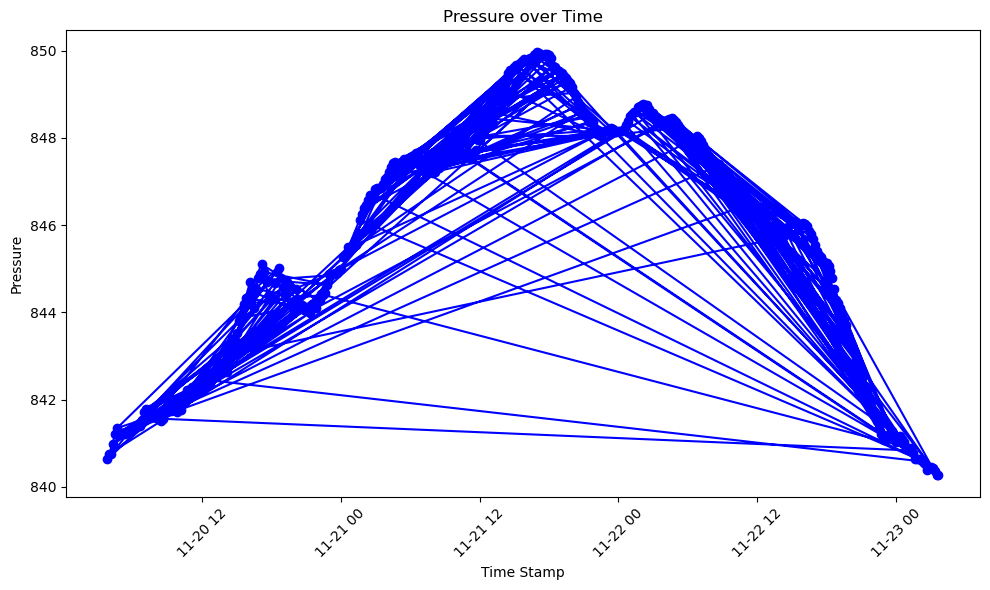

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have filled in missing values in your 'data' and created the DataFrame 'df' as mentioned in the previous response

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['time_stamp'], df['pressure'], marker='o', linestyle='-', color='b')
plt.title('Pressure over Time')
plt.xlabel('Time Stamp')
plt.ylabel('Pressure')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Try: 3 years of data

In [22]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

api_key = "E911C960-894A-11EE-8616-42010A80000B"
sensor_id = 6910
endpoint = f"https://api.purpleair.com/v1/sensors/{sensor_id}/history"

headers = {
    "X-API-Key": api_key,
}

# Set the start timestamp for the three-year period
start_timestamp = '2020-01-01T00:00:00'
start_timestamp_unix = int(datetime.strptime(start_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

# Set the end timestamp for the one-year period (24 hours added to include the whole day of 2015-01-01)
end_timestamp_unix = start_timestamp_unix + (365 * 1 - 20) * 24 * 60 * 60

average = 1440  # 1440 minutes corresponds to 1 day

# Example parameters, you can modify or add more as needed
params = {
    "fields": "humidity,humidity_a,humidity_b,temperature,temperature_a,temperature_b,pressure,pressure_a,pressure_b",
    "start_timestamp": start_timestamp_unix,
    "end_timestamp": end_timestamp_unix,
    "average": average
}

try:
    response = requests.get(endpoint, headers=headers, params=params)

    if response.status_code == 200:
        data = response.json()

    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")

In [23]:
# Fill in missing values with 0
for entry in data['data']:
    for i in range(len(entry)):
        if entry[i] is None:
            entry[i] = 0

# Create DataFrame
df = pd.DataFrame(data['data'], columns=data['fields'])
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')  # Convert timestamp to datetime if needed
df.head()

,time_stamp,humidity,humidity_a,humidity_b,temperature,temperature_a,temperature_b,pressure,pressure_a,pressure_b
0,2020-12-03,18.961,18.961,0,50.290,50.290,0,845.009,845.009,0
1,2020-11-10,49.451,49.451,0,43.374,43.374,0,841.505,841.505,0
2,2020-01-07,27.391,27.391,0,52.525,52.525,0,846.815,846.815,0
3,2020-04-02,51.779,51.779,0,58.045,58.045,0,836.085,836.085,0
4,2020-10-23,20.926,20.926,0,69.629,69.629,0,838.645,838.645,0


In [24]:
df.shape

(345, 10)

In [25]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    # Radius of the Earth in kilometers (mean value)
    radius = 6371.0
    distance = radius * c

    return distance

In [26]:
# Example usage
lat1, lon1 = 34.1, -118.1
lat2, lon2 = 34.2, -118.2

distance = haversine_distance(lat1, lon1, lat2, lon2)
print(f"The distance between the two points is approximately {distance:.2f} km.")


The distance between the two points is approximately 14.43 km.
